# D2-M

# 1. Model Prediction Improvement

## 1.1 Introduction

There are several methods that can help improve the prediction performance of models. Here are some commonly used techniques:
   
1. **Data Augmentation**: This refers to techniques that increase the amount of data by adding slightly modified copies of already existing data. For example, in image processing, these techniques could include rotation, scaling, flipping, etc. In text data, it can include methods like back translation or synonym replacement.


2. **Data Cleaning**: This involves taking care of missing values (by either filling them in based on existing data, or removing the data points entirely), and handling outliers (which might distort the training of the model).


3. **Feature engineering**: This is the process of creating new features from existing data that can help improve model performance. This can involve transformations of existing features, creating interaction features, or any other kind of data manipulation that creates new, useful input for the model.


4. **Model Selection**: This involves choosing the right machine learning algorithm for your specific problem. This could be a linear regression model, a decision tree, a neural network, etc. The choice depends on the nature of your data and the problem you're trying to solve.


5. **Hyperparameter tuning**: Hyperparameters are parameters that are not learned from the data but are set before the training process. c are learning rate, number of layers in a neural network, number of clusters in a K-means clustering, etc. Tuning these can often significantly improve performance. Techniques for hyperparameter tuning include grid search, random search, and more advanced methods like Bayesian optimization.


6. **Cross-validation**: This is a resampling procedure used to evaluate the performance of a model on a limited data sample. The dataset is partitioned into 'k' equally sized folds, and the model is trained on 'k-1' folds, and the remaining fold is used for testing. This process is repeated 'k' times so that we obtain a model performance score for each fold. It helps in assessing how the results of a statistical analysis will generalize to an independent data set.


7. **Regularization**: This is a technique used to prevent overfitting, which is when a model performs well on the training data but poorly on unseen data. Regularization works by adding a penalty term to the loss function that increases as the complexity of the model increases.


8. **Ensemble your model**: This refers to combining different models to improve overall performance. Techniques include Bagging (e.g., Random Forest), Boosting (e.g., Gradient Boosting, XGBoost), and Stacking.


Since we have already covered data cleaning, feature engineering in the previous sections, our attention in this section will shift to other topics, including data augmentation, model selection, ensemble model, regularization, cross-validation and hyperparameter tuning.

## 1.2 Dataset Exploration

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Create a dataframe
# "digits.data" contains the features and "digits.target" contains the target
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                  columns= digits['feature_names'] + ['target'])

# Separate the features (X) and the target (y)
X = df[digits['feature_names']]
y = df['target']

# Display the dataframe
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


The digit dataset contains grayscale images of hand-written digits (0 to 9) and is widely used for practicing classification algorithms in the field of machine learning. Let's break down the dataset:

**Dataset Description:**

- **Task**: Classification

- **Number of Classes**: 10 (Digits from 0 to 9)

- **Number of Samples:** 1,797

- **Number of Features:** 64 (8x8 image of each digit)

**Features:**

Each sample in the dataset is an 8x8 image of a hand-written digit. The images are represented as 64-dimensional arrays, where each element of the array corresponds to one pixel in the image. The values of the elements (pixels) range from 0 to 16, representing the grayscale intensity of the pixel. The value 0 corresponds to a white pixel, while the value 16 corresponds to a black pixel.

**Target Variable:**

The target variable (also known as labels or classes) for each sample is the digit it represents. The values of the target variable range from 0 to 9, representing the hand-written digit in the corresponding image.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

## 1.3 Data Augmentation

The `augment_data` function is defined to perform data augmentation. It takes the original images and labels as input and generates augmented versions of each image. The augmentation includes adding the original image, its horizontal flip, and a 90-degree rotation. The augmented images and labels are stored in `augmented_images` and `augmented_labels`, respectively.

In [16]:
# Load the digit dataset
digits = load_digits()
images = digits.images
labels = digits.target

The loaded dataset is unpacked into three variables: digits, images, and labels. digits is a dictionary-like object that holds the dataset, and images and labels are NumPy arrays containing the images and corresponding labels, respectively.

In [17]:
# Data augmentation
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        # orginal image
        augmented_images.append(image)
        augmented_labels.append(label)
        
        # Flipped image
        augmented_images.append(np.fliplr(image))
        augmented_labels.append(label)
        
        # Rotated image
        augmented_images.append(np.rot90(image, k=1))
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

augmented_images, augmented_labels = augment_data(images, labels)


This code combines the original images and their augmented versions into a single dataset, resulting in `all_images` and `all_labels`.

In [18]:
# Combine original and augmented data
all_images = np.concatenate([images, augmented_images])
all_labels = np.concatenate([labels, augmented_labels])

The `plot_images` function is defined to visualize the original images and their augmented counterparts. It uses Matplotlib to create a grid of images, with the number of rows and columns specified by `rows` and `cols`. The function displays `num_samples` samples of original and augmented images side by side for better understanding.

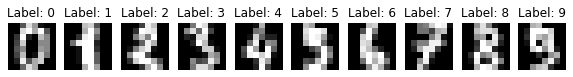

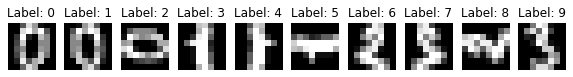

In [19]:
# Visualize the original images and their augmented counterparts
def plot_images(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

num_samples = 10# Number of samples to visualize for each category
original_images_sample = images[:num_samples]
augmented_images_sample = augmented_images[:num_samples]

plot_images(original_images_sample, labels[:num_samples], 1, num_samples)
plot_images(augmented_images_sample, labels[:num_samples], 1, num_samples)

## 1.4 Data Pre-processing

The digits dataset from sklearn is a clean dataset, meaning it `doesn't have missing values`, it `doesn't contain categorical features` that need to be encoded, and it `doesn't have obvious outliers`. Therefore, some pre-processing steps like handling missing values, encoding categorical variables, or outlier treatment are not applicable in this case.

## 1.5 Feature Engineering

The digits dataset is a set of 8x8 pixel images, and each pixel in the image is a feature. There are a total of 64 features for each image. These features are already in a form that's suitable for machine learning models, so it's typically not necessary to do additional feature engineering.

### 1.5.1 Difference between Feature Engineering and Feature Selection:
The main difference between feature engineering and feature selection is their focus and purpose:

- **Feature Engineering:** Focuses on creating, transforming, or enhancing features to provide the model with more meaningful and representative information from the data.

- **Feature Selection:** Focuses on selecting a subset of relevant features to reduce model complexity, prevent overfitting, and improve model performance.

## 1.6 Hyperparameter Tuning using GridSearchCV with Visualization

### 1.6.1 Split the data into training and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

## 1.6.2 Hyperparameter Tuning using GridSearchCV with Visualization

This section performs model selection and hyperparameter tuning using GridSearchCV. We define `param_grid`, a dictionary with hyperparameters and their possible values. The `GridSearchCV` will perform a grid search over the parameter grid and use 5-fold cross-validation (`cv=5`) to find the best combination of hyperparameters for the Random Forest Classifier. After fitting the grid search, the best model is stored in `grid_search.best_estimator_`.

1. Hyperparameter Grid: We make a list of different values to try for each hyperparameter.

2. Cross-Validation: It tests each combination on different parts of the training data to see which one works best.

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train.reshape(len(X_train), -1), y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

1. param_grid definition:
The param_grid is a Python dictionary that defines a grid of hyperparameter values to be searched during the grid search process. In this case, it contains two hyperparameters for the RandomForestClassifier: 'n_estimators' and 'max_depth'. **The 'n_estimators' hyperparameter controls the number of trees in the random forest**, and the **'max_depth' hyperparameter sets the maximum depth of each tree.** The grid specifies three values for each hyperparameter to be tested during the grid search.

2. rf_model instantiation:
A RandomForestClassifier model is created using the RandomForestClassifier() constructor from the scikit-learn library. This initializes a random forest classifier with default hyperparameter values. Later, we will use grid search to find the best combination of hyperparameters.

3. GridSearchCV setup:
GridSearchCV is a function from scikit-learn used for hyperparameter tuning using cross-validation. It takes three main arguments:

    a. The first argument (rf_model in this case) is the estimator or the model for which we want to tune the hyperparameters. In our case, it's the random forest classifier we created earlier.

    b. The second argument (param_grid) is the dictionary of hyperparameters and the corresponding values to be searched.

    c. The third argument (cv=5) represents the number of cross-validation folds. Here, cv=5 indicates that the data will be divided into 5 folds, and the grid search will perform 5-fold cross-validation.

4. fit method:
The fit method of the GridSearchCV object is called with the training data and labels. In this case, X_train.reshape(len(X_train), -1) is used to reshape the training data (X_train) to a 2D array where each row represents a data sample, and -1 in the second dimension means the code infers the appropriate size to maintain the original data's total number of elements. y_train is the corresponding array of labels for the training data.

5. Grid search process:
During the grid search process, GridSearchCV will exhaustively search through all the combinations of hyperparameters specified in the param_grid. For each combination, it will perform cross-validation on the training data to evaluate the model's performance. The number of cross-validation folds (cv=5) means that the dataset will be split into 5 parts, and the model will be trained and validated five times, each time using a different fold as the validation set.

6. Best hyperparameters:
Once the grid search is complete, GridSearchCV will identify the combination of hyperparameters that resulted in the best performance (based on the specified evaluation metric, usually accuracy for classification tasks). The best hyperparameters will be stored in the best_params_ attribute of the GridSearchCV object.

After this code runs, you can access the best hyperparameters using grid_search.best_params_, and you can also obtain the best model with those hyperparameters using grid_search.best_estimator_. You can then use this best model to make predictions on new data.

## 1.6.3 Visualize Hyperparameter Tuning Results

This part is new and focuses on the visualization of hyperparameter tuning results. We extract the mean cross-validation scores (`mean_scores`) and the corresponding hyperparameter combinations (`param_combinations`) from the `grid_search.cv_results_ dictionary`. The `for` loop then prints each mean CV score along with its corresponding hyperparameter combination for reference.

After printing, we create a scatter plot to visualize the mean CV scores with respect to the hyperparameter combinations. The x-axis represents the values of `n_estimators`, the y-axis represents the values of `max_depth`, and the color of each point corresponds to the mean CV score. This plot helps us understand how different hyperparameter settings affect the model's performance during hyperparameter tuning.

Mean CV Score: 0.9744, Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Mean CV Score: 0.9793, Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Mean CV Score: 0.9823, Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Mean CV Score: 0.9725, Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Mean CV Score: 0.9757, Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Mean CV Score: 0.9765, Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Mean CV Score: 0.9730, Hyperparameters: {'max_depth': 20, 'n_estimators': 50}
Mean CV Score: 0.9791, Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Mean CV Score: 0.9805, Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


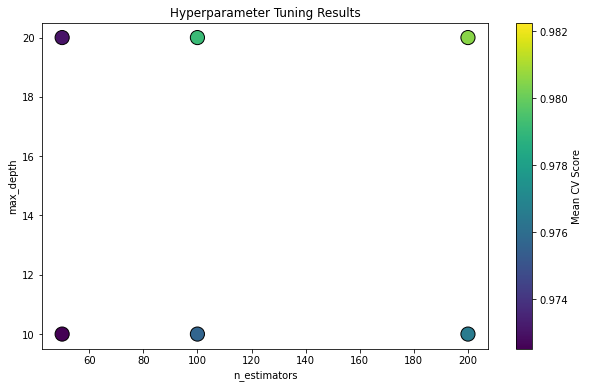

In [22]:
# Visualize Hyperparameter Tuning Results
mean_scores = grid_search.cv_results_['mean_test_score']
param_combinations = list(grid_search.cv_results_['params'])

for mean_score, params in zip(mean_scores, param_combinations):
    print(f"Mean CV Score: {mean_score:.4f}, Hyperparameters: {params}")

# Plotting the Mean Cross-Validation Scores
n_estimators_values = [param['n_estimators'] for param in param_combinations]
max_depth_values = [param['max_depth'] for param in param_combinations]

plt.figure(figsize=(10, 6))
plt.scatter(n_estimators_values, max_depth_values, c=mean_scores, cmap='viridis', s=200, edgecolors='k')
plt.colorbar(label='Mean CV Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

1. mean_scores and param_combinations:
The code retrieves the mean cross-validation scores and the corresponding hyperparameter combinations from the cv_results_ attribute of the GridSearchCV object.

2. Printing mean scores and hyperparameters:
The code uses a for loop to iterate over the mean_scores and param_combinations lists. For each iteration, it prints the mean cross-validation score and the hyperparameter values in a formatted manner.

3. Plotting the Mean Cross-Validation Scores:
The code prepares the data to create a scatter plot to visualize the mean cross-validation scores for different hyperparameter combinations. It creates two lists, n_estimators_values and max_depth_values, which contain the 'n_estimators' and 'max_depth' values for each combination in param_combinations, respectively.

4. Scatter plot:
The code then plots a scatter plot using the plt.scatter function from the matplotlib library. The x values are the 'n_estimators' values, the y values are the 'max_depth' values, and the color of each point is determined by the corresponding mean cross-validation score (mean_scores). The colormap 'viridis' is used to represent different levels of mean CV scores. The size of each point is set to 200, and the edge color of the points is set to black (edgecolors='k').

5. Colorbar:
A colorbar is added to the plot using plt.colorbar to show the mapping of colors to mean CV scores. The label for the colorbar is set as 'Mean CV Score'.

6. Labels and title:
The plot is given appropriate labels for the x-axis (xlabel) and y-axis (ylabel). The title of the plot is set as 'Hyperparameter Tuning Results'.

7. Display the plot:
Finally, the plot is displayed using plt.show().

This visualization allows us to identify which combinations of 'n_estimators' and 'max_depth' lead to higher mean cross-validation scores, providing insights into the optimal hyperparameters for the RandomForestClassifier model.

### 1.6.4 Best Model from Hyperparameter Tuning

In [23]:
# Best Model from Hyperparameter Tuning
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(n_estimators=200)

## 1.7 Regularization

We select the best model found during hyperparameter tuning and store it in `best_model`. Additionally, we create a regularized Random Forest Classifier (`regularized_model`) with a specific `max_depth` hyperparameter to prevent overfitting.

In [24]:
regularized_model = RandomForestClassifier(max_depth=10)
regularized_model.fit(X_train.reshape(len(X_train), -1), y_train)

RandomForestClassifier(max_depth=10)

1. RandomForestClassifier instantiation:
A regularized version of the RandomForestClassifier model is created with the max_depth hyperparameter set to 10. The max_depth hyperparameter determines the maximum depth of each tree in the random forest. By setting a value for max_depth, we are applying regularization to the model, which restricts the tree depth and helps prevent overfitting.

2. Data reshaping:
Before training the model, the training data X_train is reshaped using the reshape function. The X_train dataset likely contains 2D images represented as a 3D array (e.g., (num_samples, height, width)). To train the model, the images are flattened into a 1D array, so each row in the dataset represents a single data sample. This is done using X_train.reshape(len(X_train), -1), where -1 is used as a placeholder to infer the appropriate size of the second dimension.

3. Model training:
The regularized RandomForestClassifier model (regularized_model) is trained on the reshaped training data X_train along with the corresponding labels y_train using the fit method. During the training process, the model will learn to make predictions based on the input data and minimize the chosen loss function (e.g., entropy or Gini impurity for classification tasks).

After training is complete, regularized_model is now a RandomForestClassifier model with the specified max_depth regularization, and it is ready to make predictions on new data.

## 1.8 Ensemble Techniques (Bagging and Voting)

In model hyperparameter tuning, "Voting" is a technique where we combine the predictions of multiple models, each with different settings, to make better decisions.

Imagine you have multiple versions of the same model, but each one is trained with different hyperparameter settings (like different numbers of trees in a Random Forest). Voting takes all these models and asks each one to make a prediction. Then, it looks at the predictions of all the models and combines them to make the final decision.

The idea is that each model might be good at certain things or on certain parts of the data. By combining their predictions, we can get a more reliable and accurate overall result.

In simple terms, it's like asking a group of experts to give their opinion, and then we make the decision based on what the majority of experts say. This helps us make better predictions and can lead to more robust and powerful models.

In this section, we define two ensemble models: the Bagging Classifier (`bagging_model`) using regularized_model as the base estimator, and the Voting Classifier (`voting_model`) that combines the `regularized_model` and the `bagging_model`.

In [25]:
# Ensemble Techniques (Bagging and Voting)
bagging_model = BaggingClassifier(base_estimator=regularized_model, n_estimators=10, random_state=42)
voting_model = VotingClassifier([('rf', regularized_model), ('bagging', bagging_model)])


BaggingClassifier instantiation:
The BaggingClassifier is created with the following parameters:

1. base_estimator=regularized_model: The base_estimator parameter specifies the base model to be used in the ensemble. In this case, the regularized_model, which is the RandomForestClassifier with max_depth=10, is used as the base model for Bagging. Bagging works by training multiple instances of the base model on different subsets of the training data.

2. n_estimators=10: The n_estimators parameter determines the number of base estimators (trees in this case) to be used in the Bagging ensemble. Here, 10 trees will be trained on different random subsets of the training data.

3. random_state=42: The random_state parameter is set to ensure reproducibility of the results. It fixes the random seed, allowing the same random subsets to be generated each time the code is run.

The VotingClassifier is created with the following parameters:

[('rf', regularized_model), ('bagging', bagging_model)]: The VotingClassifier takes a list of (name, estimator) pairs as its parameter. In this case, the VotingClassifier will include two models in the ensemble:

The first model is named 'rf', and it uses the regularized_model, which is the RandomForestClassifier with max_depth=10.

The second model is named 'bagging', and it uses the previously created BaggingClassifier.

The VotingClassifier combines the predictions of its constituent models (the base model and the Bagging ensemble) to make final predictions. The ensemble will use a majority vote (for classification tasks) or average (for regression tasks) to combine the individual models' predictions.

## 1.9 Train the Bagging and Voting models on the entire training data

In [26]:
# Train the Bagging and Voting models on the entire training data
bagging_model.fit(X_train.reshape(len(X_train), -1), y_train)
voting_model.fit(X_train.reshape(len(X_train), -1), y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=10)),
                             ('bagging',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10),
                                                random_state=42))])

## 1.10 Evaluate the Bagging and Voting models on the test set

The Bagging and Voting models are evaluated on the test set, and their performance is measured using accuracy scores.

In [27]:
y_pred_bagging = bagging_model.predict(X_test.reshape(len(X_test), -1))
y_pred_voting = voting_model.predict(X_test.reshape(len(X_test), -1))

test_accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
test_accuracy_voting = accuracy_score(y_test, y_pred_voting)

## 1.11 Print results

In [28]:
# Print results
print("Best Model Parameters:", grid_search.best_params_)
print("Test Accuracy (Best Model):", best_model.score(X_test.reshape(len(X_test), -1), y_test))
print("Test Accuracy (Bagging Model):", test_accuracy_bagging)
print("Test Accuracy (Voting Model):", test_accuracy_voting)

Best Model Parameters: {'max_depth': None, 'n_estimators': 200}
Test Accuracy (Best Model): 0.9826147426981919
Test Accuracy (Bagging Model): 0.9756606397774688
Test Accuracy (Voting Model): 0.9749652294853964


## 1.12 Exercise

Question: You are working on a classification problem using a Support Vector Machine (SVM) classifier. The dataset you are using is quite large and has a high number of features. You want to optimize the hyperparameters of the SVM model to achieve better performance. Write a code snippet in Python using scikit-learn to perform hyperparameter tuning for the SVM classifier using GridSearchCV. Assume the dataset is already split into X_train, X_test, y_train, and y_test, and the SVM classifier is initialized as SVC().

Hint: You can consider tuning hyperparameters like the kernel type, C (regularization parameter), and gamma.

Note: For the purpose of this question, you don't need to worry about standardizing or normalizing the features.

Please write your code below:

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Create the GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Perform the hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the GridSearchCV
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test data
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with best hyperparameters:", accuracy)


# 2. Bagging and Boosting

## 2.1 Introduction

### 2.1.1 Overview of Ensemble Learning:

- Ensemble learning is a powerful technique in machine learning where multiple models are combined to create a more robust and accurate predictive model.
- The idea is to leverage the collective intelligence of multiple models to make better predictions than any individual model could achieve alone.
- Ensemble learning draws inspiration from the wisdom of crowds, where diverse opinions lead to better decisions than relying on a single perspective.
- By aggregating the predictions from multiple models, ensemble learning aims to improve generalization and reduce the risk of overfitting.



### 2.1.2 Importance of Ensemble Learning in Data Science:

- Data science often deals with complex and noisy datasets where building a single strong model may be challenging.
- Ensemble learning helps address the limitations of individual models by combining their strengths and compensating for their weaknesses.
- Ensemble methods can significantly boost the accuracy and performance of predictive models, making them invaluable in various real-world applications.
- Ensemble learning is widely used in competitions like Kaggle, where top-performing models often utilize sophisticated ensemble techniques.
- In practical scenarios, ensemble models are more reliable and trustworthy due to their ability to capture diverse patterns and avoid model bias.

### 2.1.3 What to Expect in This Session:

- In this session, we will delve into two essential ensemble learning techniques: bagging and boosting.
- We will understand the underlying principles of each technique, explore their strengths and weaknesses, and discover when to use them.
- We will also demonstrate coding examples using Python and scikit-learn to solidify your understanding and enable you to implement these techniques in your projects.
- By the end of this session, you will have a clear understanding of how bagging and boosting contribute to the success of predictive models and the importance of ensemble learning in data science.

## 2.2 Bagging (Bootstrap Aggregating)

### 2.2.1 Definition and Purpose of Bagging:

- Bagging, short for Bootstrap Aggregating, is an ensemble learning technique that aims to improve the accuracy and robustness of predictive models.
- The primary purpose of bagging is to reduce variance and combat overfitting, which are common challenges in machine learning.
- By combining predictions from multiple base learners, bagging reduces the risk of relying too heavily on any one model's idiosyncrasies.


### 2.2.2 How Bagging Works:

1. Bootstrapping and Creating Subsets:
- Bagging starts by creating multiple subsets of the original training data through bootstrapping.
- Bootstrapping involves randomly sampling data with replacement, resulting in diverse subsets with the same size as the original dataset.


2. Training Multiple Base Learners:
- Each subset is used to train an independent base learner (model), such as decision trees, SVMs, or neural networks.
- These base learners are trained independently, and their predictions are combined later to form the ensemble.


3. Aggregating Predictions:
- Once all base learners are trained, the final prediction is made by aggregating their individual predictions.
- For regression tasks, predictions are averaged, while for classification tasks, majority voting is used to decide the final prediction.


### 2.2.3 Advantages of Bagging:

1. Reducing Variance and Overfitting:
- Bagging's main advantage is its ability to reduce variance and combat overfitting.
- By combining predictions from diverse models, it results in a more balanced and stable ensemble model.


2. Robustness to Noisy Data and Outliers:
- Bagging is robust to noisy data and outliers, as it diminishes the impact of individual data points through aggregation.
- Outliers are less likely to affect the overall prediction due to the averaging or voting process.


### 2.2.4 Common Algorithms Using Bagging:

1. Random Forest:
- Random Forest is one of the most popular bagging algorithms that uses decision trees as base learners.
- It builds a large number of decision trees, and each tree is trained on a bootstrapped subset of the data.
- The final prediction is made by aggregating the predictions of all individual trees.

2. Bagged Decision Trees:
- Bagged Decision Trees, or simply Bagging with decision trees, is a straightforward bagging approach.
- It applies the same concept as Random Forest but with a smaller number of trees (often not enough to be considered a forest).

3. Bagged SVMs (Support Vector Machines):
- Bagging can also be applied to other base learners like Support Vector Machines (SVMs).
- Bagged SVMs utilize subsets of data for training multiple SVM models, and their predictions are aggregated to make the final prediction.

### 2.2.5 Coding Example with Random Forest (Python and scikit-learn):

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

#### 2.2.5.1 Load and Introduce the Dataset 

In [31]:
# Load the covertype dataset from OpenML
covertype = fetch_openml('covertype', version=4)
X = covertype.data
y = covertype.target.astype('int') - 1  # Shift labels to range 0-6

# Create a DataFrame
df = pd.DataFrame(X, columns=covertype.feature_names)
df['target'] = y

# Show the dataframe
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0,0,0,0,0,0,0,0,0,4
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0,0,0,0,0,0,0,0,0,4
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0,0,0,0,0,0,0,0,0,1
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0,0,0,0,0,0,0,0,0,1
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0,0,0,0,0,0,0,0,0,4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Elevation                           581012 non-null  float64 
 1   Aspect                              581012 non-null  float64 
 2   Slope                               581012 non-null  float64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64 
 6   Hillshade_9am                       581012 non-null  float64 
 7   Hillshade_Noon                      581012 non-null  float64 
 8   Hillshade_3pm                       581012 non-null  float64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64 
 10  Wilderness_Area1                    581012 non-null  category
 11  Wilderness_Ar

The dataset consists of 581,012 data samples, each representing a specific location within the Roosevelt National Forest. Each data sample has a set of features (input variables) that describe the location's cartographic characteristics, and a target label (output variable) indicating the forest cover type at that location. The target label is an integer value ranging from 0 to 6, representing one of seven different forest cover types:


1. Elevation: Floating-point numbers representing the elevation of the location in meters above sea level.

2. Aspect: Floating-point numbers representing the azimuthal direction of the slope in degrees (0-360), indicating the direction the slope faces.

3. Slope: Floating-point numbers representing the slope of the terrain in degrees, indicating the steepness of the slope.

4. Horizontal_Distance_To_Hydrology: Floating-point numbers representing the horizontal distance (in meters) to the nearest water body (river, lake, etc.).

5. Vertical_Distance_To_Hydrology: Floating-point numbers representing the vertical distance (in meters) to the nearest water body. It can be positive or negative, depending on whether the location is above or below the water body.

6. Horizontal_Distance_To_Roadways: Floating-point numbers representing the horizontal distance (in meters) to the nearest roadway.

7. Hillshade_9am: Floating-point numbers representing the hillshade index at 9 am, indicating the amount of shade cast by nearby terrain at 9 am.

8. Hillshade_Noon: Floating-point numbers representing the hillshade index at noon, indicating the amount of shade cast by nearby terrain at noon.

9. Hillshade_3pm: Floating-point numbers representing the hillshade index at 3 pm, indicating the amount of shade cast by nearby terrain at 3 pm.

10. Horizontal_Distance_To_Fire_Points: Floating-point numbers representing the horizontal distance (in meters) to the nearest fire observation point.

11. Wilderness_Area1 to Wilderness_Area4: Categorical variables (category data type) representing binary indicators for four wilderness areas. Each column corresponds to a specific wilderness area, and the value is either 0 or 1, indicating whether the location is in that particular wilderness area.

12. Soil_Type1 to Soil_Type40: Categorical variables (category data type) representing binary indicators for forty soil types. Each column corresponds to a specific soil type, and the value is either 0 or 1, indicating whether the location has that particular soil type.

13. target: Integer numbers representing the forest cover type (the target variable). The values range from 0 to 6, where each integer corresponds to a specific forest cover type, as described earlier:

    - 0: Spruce/Fir
    - 1: Lodgepole Pine
    - 2: Ponderosa Pine
    - 3: Cottonwood/Willow
    - 4: Aspen
    - 5: Douglas-fir
    - 6: Krummholz (a type of high-elevation, stunted forest)

This code fetches the **covertype** dataset from OpenML, and then extracts the data and target labels. The labels are shifted from 1-7 to 0-6 for ease of use.

#### 2.2.5.2 Data Subset (for speed)

In [33]:
# Select a subset of data for demonstration purposes (and for faster execution)
X = X[:20000]
y = y[:20000]

Given the large size of the **covertype** dataset, we take a subset of 20,000 samples for faster demonstration.

#### 2.2.5.3 Data Splitting

In [34]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This splits the data into training and testing sets. 30% of the data is reserved for testing.

#### 2.2.5.4 Results Storage Initialization

In [35]:
# Initialize list to store results of each model
results = []

An empty list to store accuracy results for each model.

#### 2.2.5.5 Simple Decision Tree Training and Prediction

In [36]:
# Train and test a simple decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
results.append(['Simple Decision Tree', accuracy_score(y_test, tree_pred)])

This section trains a basic decision tree on the training data, makes predictions on the test data, and stores the accuracy in the results list.

#### 2.2.5.6 Random Forest Training and Prediction

In [37]:
# Train and test a Random Forest with 5 trees
rf_small = RandomForestClassifier(n_estimators=5, random_state=42)
rf_small.fit(X_train, y_train)
rf_small_pred = rf_small.predict(X_test)
results.append(['Random Forest (5 trees)', accuracy_score(y_test, rf_small_pred)])

`n_estimators=5`: This sets the number of decision trees (estimators) in the random forest to 5. Random Forest is an ensemble method that combines the predictions of multiple decision trees to make final predictions.

`random_state=42`: This parameter is used to set the random seed for reproducibility. It ensures that the random initialization of the random forest is the same each time the code is run.

#### 2.2.5.7 Manual Bagging Implementation

In [38]:
# Manual implementation of Bagging
n_learners = 5  # Number of learners (trees) for bagging
predictions = []  # List to store predictions of each learner

# Bootstrapping and training for each learner
for i in range(n_learners):
    boot_X, boot_y = resample(X_train, y_train, replace=True, n_samples=len(X_train))
    tree = DecisionTreeClassifier()
    tree.fit(boot_X, boot_y)
    predictions.append(tree.predict(X_test))

resample function:


The resample function is typically provided by a machine learning library, such as scikit-learn. It is used to randomly sample (with replacement) from the training data to create a new bootstrap dataset for training a learner (in this case, a DecisionTreeClassifier). The function takes three main arguments:

- X_train: The feature data (input data) of the training set.

- y_train: The target labels (output data) of the training set.

- replace=True: This argument specifies that sampling should be done with replacement. Each data point in the original training set can be selected multiple times in the bootstrap sample, and some data points may not be selected at all. If replace=False, it would be simple random sampling without replacement.

- n_samples=len(X_train): This argument specifies the number of samples to be drawn from the training data for the bootstrap sample. In this case, n_samples is set to be equal to the number of data points in the original training set (X_train), which means the bootstrap sample has the same size as the original training set.

This manually implements bagging by bootstrapping the training data **n_learners** times, training a decision tree on each bootstrap sample, and storing its predictions.

#### 2.2.5.8 Mode Calculation for Bagging Predictions

In [39]:
# Function to compute mode for an array
def compute_mode(array):
    return np.bincount(array).argmax()

# Convert predictions list of arrays to a 2D numpy array
predictions_array = np.array(predictions)

# Calculate mode of predictions for bagging
mode_predictions = []
for column in predictions_array.T:  # Now we transpose the numpy array
    mode_predictions.append(compute_mode(column))
mode_predictions = np.array(mode_predictions)
results.append(['Manual Bagging (Mode)', accuracy_score(y_test, mode_predictions)])

1. compute_mode function:
The compute_mode(array) function takes an input array and calculates the mode, which is the value that appears most frequently in the array. It uses NumPy's bincount function to count the occurrences of each unique element in the array and then returns the element with the highest count (i.e., the mode) using argmax().

2. Convert predictions to a 2D numpy array:
The predictions list, which contains the predictions from multiple learners, is converted into a 2D numpy array named predictions_array. Each row of this array represents the predictions of a single learner, and each column represents the predictions for a specific sample in the test set.

3. Calculate mode of predictions for bagging:
The code then proceeds to calculate the mode predictions for the bagging ensemble. It initializes an empty list called mode_predictions.

4. Transpose the predictions array:
Before computing the mode predictions, the numpy array predictions_array is transposed using predictions_array.T. This step allows us to loop over the columns (samples) instead of the rows (learners).

5. Compute mode for each column (sample):
For each column (sample) in the transposed predictions_array, the compute_mode function is applied to determine the mode of the predictions across all learners for that specific sample. The mode predictions for all samples are stored in the mode_predictions list.

6. Convert mode predictions to a numpy array:
The mode_predictions list is then converted back into a numpy array using np.array(mode_predictions).

7. Calculate accuracy and store results:
Finally, the accuracy of the bagging ensemble, using mode predictions, is computed by comparing the mode_predictions array against the ground truth labels y_test. The accuracy score is then appended to the results list with a description indicating that manual bagging with mode predictions was used.

#### 2.2.5.9 Median Calculation for Bagging Predictions

In [40]:
# Calculate median of predictions for bagging
median_predictions = np.median(predictions, axis=0).astype(int)
results.append(['Manual Bagging with Median', accuracy_score(y_test, median_predictions)])

This section demonstrates another way to aggregate predictions by using the median. It then stores the results.

#### 2.2.5.10 Convert Results to DataFrame and Display

In [41]:
# Convert the results list to a DataFrame and display it
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Sort the DataFrame based on the 'Accuracy' column in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_results.head()

,Model,Accuracy
0,Manual Bagging (Mode),0.844500
1,Manual Bagging with Median,0.841167
2,Random Forest (5 trees),0.827667
3,Simple Decision Tree,0.810500


This converts the **results** list into a pandas DataFrame and displays it for easy comparison of model accuracies.

### 2.2.6 Exercise

Bagging
- Question: What is the main principle behind the Bagging technique? How does it help in reducing overfitting?
- Answer: Bagging, or Bootstrap Aggregating, involves training multiple models independently on different bootstrapped subsets of the data and then aggregating their predictions. By averaging out the errors, bagging helps in reducing the variance and thus overfitting.

## 2.3 Bagging (Bootstrap Aggregating)

### 2.3.1 Definition and Purpose of Boosting:

- Boosting is an ensemble learning technique that focuses on creating a strong learner by combining multiple weak learners iteratively.
- The main purpose of boosting is to improve the accuracy and performance of predictive models by giving more emphasis to misclassified instances during training.
- Boosting learns from its mistakes in an adaptive manner, continually refining its predictions to achieve high accuracy on complex datasets.


### 2.3.2 How Boosting Works:

1. Sequential Learning and Weighted Misclassifications:
- Boosting works in a sequential manner, where each base learner is trained based on the performance of the previous ones.
- During training, it assigns higher weights to misclassified instances, making them more influential in subsequent iterations.


2. Iterative Training of Base Learners:
- In each iteration, a new base learner is trained to correct the mistakes made by the ensemble so far.
- The base learners are typically weak models (e.g., shallow decision trees) to avoid overfitting and maintain interpretability.


3. Emphasizing Difficult Instances:
- Boosting focuses on challenging instances that are frequently misclassified by previous base learners.
- By repeatedly emphasizing these difficult instances, boosting ensures that the ensemble model pays more attention to them and gradually improves its performance.



### 2.3.3 Advantages of Boosting:

1. Adaptive Learning and High Accuracy:
- Boosting's adaptive learning approach allows it to learn from misclassifications and significantly improve predictive accuracy.
- It is particularly effective in handling complex relationships in data, making it suitable for various real-world applications.


2. Model Versatility and Feature Importance:
- Boosting can be applied with various base learners, such as decision trees, SVMs, and neural networks.
- Additionally, many boosting algorithms provide feature importance scores, enabling us to identify the most influential features in the model's decision-making process.


### 2.3.4 Common Algorithms Using Boosting:

1. AdaBoost (Adaptive Boosting):
- AdaBoost is one of the earliest and most popular boosting algorithms.
- It assigns higher weights to misclassified instances and combines the predictions of weak learners to create a strong ensemble model.
- AdaBoost is suitable for both classification and regression tasks.


2. Gradient Boosting Machines (GBM):
- GBM builds base learners sequentially, focusing on the gradients of the loss function to optimize the model's performance.
- It uses a process called gradient descent to minimize the errors in each iteration.
- GBM is widely used for regression and classification tasks and is known for its high accuracy and flexibility.


3. XGBoost and LightGBM:
- XGBoost and LightGBM are optimized implementations of gradient boosting that are efficient and scalable.
- They utilize advanced techniques like parallel processing and tree-pruning to achieve better performance.
- These algorithms are popular in data science competitions and real-world applications due to their speed and accuracy.




### 2.3.5 Coding Example with AdaBoost (Python and scikit-learn):

In [42]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

This section imports all the necessary libraries and modules we'll use throughout the demonstration.

#### 2.3.5.1 Load and preprocess data

In [43]:
# Load the covertype dataset from OpenML
covertype = fetch_openml('covertype', version=4)
X = covertype.data
y = covertype.target.astype('int') - 1  # Shift labels to range 0-6

# Select a subset of data for demonstration purposes (and for faster execution)
X = X[:20000]
y = y[:20000]

#### 2.3.5.2 Split data into training and test sets

In [44]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This line splits our data into training and test sets. 70% of the data is used for training and 30% for testing.

#### 2.3.5.4 Initialize a list to store results

In [45]:
# Initialize list to store results of each model
results = []

We'll store the accuracy results of each model in this list and then convert it to a DataFrame at the end.

#### 2.3.5.5 Train and test a simple decision tree classifier

In [46]:
# Train and test a simple decision tree classifier
tree = DecisionTreeClassifier(max_depth=1)  # Setting depth to 1, as AdaBoost typically uses 'stumps'
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
results.append(['Simple Decision Tree', accuracy_score(y_test, tree_pred)])

We train a simple decision tree "stump" (tree of depth 1) on the training data and then predict and evaluate its accuracy on the test set.

#### 2.3.5.6 Train and test AdaBoost with 5 weak learners

In [47]:
# Train and test AdaBoost with 20 weak learners (stumps)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                              n_estimators=20, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
results.append(['AdaBoost (20 learners)', accuracy_score(y_test, adaboost_pred)])

Here, we train an AdaBoost classifier using decision tree stumps as weak learners. We use 5 such stumps. After training, we predict on the test set and evaluate the accuracy.

#### 2.3.5.7 Convert the results list to a sorted DataFrame and display it

In [48]:
# Convert the results list to a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Sort the DataFrame based on the 'Accuracy' column in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_results.head()

,Model,Accuracy
0,AdaBoost (20 learners),0.480333
1,Simple Decision Tree,0.398500


### 2.3.6 Exercise

Boosting
- Question: Describe how boosting works. How is it different from bagging?
- Answer: Boosting trains learners sequentially where each subsequent learner tries to correct the mistakes of the previous one. Unlike bagging, which aims to reduce variance, boosting aims to reduce bias and variance.

## 2.4 Strengths and Weaknesses

### 2.4.1 Comparison of Bagging and Boosting:

- Bagging and Boosting are both ensemble learning techniques that combine multiple models to improve predictive performance.
- Bagging aims to reduce variance and overfitting by aggregating predictions from diverse models.
- Boosting focuses on adaptive learning and aims to correct mistakes made by previous base learners in an iterative manner.


### 2.4.2 Strengths of Bagging:

1. Reduced Variance and Overfitting:
- Bagging reduces the risk of overfitting by combining predictions from multiple models with diverse training subsets.

2. Robustness to Noisy Data:
- Bagging is robust to noisy data and outliers since it aggregates predictions, minimizing the impact of individual data points.

3. Efficient Parallelization:
- Training base learners in bagging can be easily parallelized, making it efficient and scalable.


### 2.4.3 Weaknesses of Bagging:

1. Lack of Interpretability:
- The ensemble model in bagging may lack interpretability, especially if the base learners are complex models like Random Forest.


2. Bias Preservation:
- Bagging may not address bias in the base learners; if the base models are biased, the ensemble may inherit the bias.


3. Limited Performance Improvement:
- Bagging may not improve performance significantly if the base learners are already strong and diverse.



### 2.4.4 Strengths of Boosting:
1. Adaptive Learning and High Accuracy:
- Boosting adaptively learns from mistakes and focuses on challenging instances, leading to high accuracy.
2. Model Versatility and Feature Importance:
- Boosting can be used with various base learners and often provides feature importance scores for better understanding.



### 2.4.5 Weaknesses of Boosting:
1. Sensitivity to Noisy Data and Outliers:
- Boosting may be sensitive to noisy data and outliers, affecting model performance.
2. Slower Training and Limited Parallelization:
- Training base learners sequentially makes boosting slower than bagging, and it may be less efficient to parallelize.
3. Potential Overfitting:
- Boosting may be prone to overfitting, especially if the number of iterations is too high.


### 2.4.6 Choosing Between Bagging and Boosting: Considerations:
- The choice between bagging and boosting depends on the dataset, the complexity of the problem, and the available computational resources.
- Bagging is suitable when the base models are diverse and the goal is to reduce variance and overfitting.
- Boosting is preferred when high accuracy is crucial, and the dataset is not significantly affected by noisy data and outliers.

## 2.5 Strengths and Weaknesses

1. High Variance Model:
- You've trained a deep decision tree on your dataset and noticed that it performs extremely well on the training data but poorly on the validation data.

- Question: Which ensemble technique might help remedy this, bagging or boosting?
- Answer: Bagging. The described scenario suggests overfitting, which is a result of high variance. Bagging is more appropriate for reducing variance.
2. High Bias Model:
- Your team trained a shallow decision tree (i.e., a decision stump) on a complex dataset. The model performs poorly on both training and validation sets.

- Question: Which ensemble technique might help improve this model's performance, bagging or boosting?
- Answer: Boosting. The model is underfitting the data, which is a sign of high bias. Boosting aims to reduce bias by sequentially correcting the errors of the previous models.
3. Large Dataset:
- You have a very large dataset and are concerned about the training time. You're considering an ensemble technique to improve your model's performance.

- Question: Which technique, bagging or boosting, would typically be faster in training?
- Answer: Bagging. Boosting trains models sequentially, where each model tries to correct the errors of the previous one, which can be time-consuming. Bagging trains its models in parallel, making it often faster, especially with large datasets.
4. Noisy Data:
- Your dataset contains a significant amount of noise, and outliers are causing models to underperform.

- Question: Which ensemble method, bagging or boosting, might be more robust to such noise and why?
- Answer: Bagging. Boosting might overemphasize the outliers by giving them higher weights, leading to overfitting. Bagging, by averaging out predictions, is generally more robust to noisy data.
5. Model Diversity:
- You're working on an ensemble model, and you have access to various diverse base models. You believe the errors in these models are largely uncorrelated.

- Question: Which ensemble technique might benefit more from this diversity, bagging or boosting?
- Answer: Bagging. Bagging benefits greatly from the independence of errors among base models. If each model makes different errors, bagging can average them out, leading to a strong combined prediction.
6. Information on Error Types:
- After evaluating a model, you've noticed that it's making many types of errors, but the frequency of each type is low.

- Question: If you had to choose an ensemble technique to correct diverse error types, would you pick bagging or boosting?
- Answer: Boosting. Boosting is designed to sequentially correct the errors of previous models, making it suitable for addressing diverse types of errors.
7. Final Model Interpretability:
- You're working on a healthcare project where the interpretability of the model is crucial. Doctors want to understand how the model makes decisions.

- Question: Which ensemble technique, bagging or boosting, might be more challenging in terms of interpretability, and why?
- Answer: Both techniques can be challenging for interpretability as they combine multiple models. However, boosting, especially with many iterations, can be more challenging because it focuses on correcting errors sequentially, leading to a more complex combined model. d

# 3. Supply chain example

## 3.1 Introduction to the Dataset

The dataset at hand is a comprehensive sales record dataset provided by a a renowned consumer goods company. In here, we can it "company A". This dataset aims to facilitate the prediction of item sales quantities in each unit (EA) using various informative features. The dataset encompasses a wide range of variables that provide insights into the sales dynamics and factors influencing consumer behavior.


### Objective:

The primary objective of this dataset is to develop a predictive model that accurately estimates the sales quantity of each item (Pos_Qty_EA) based on the provided features. By leveraging the historical sales data, "company A" aims to forecast item sales more effectively, optimize inventory management, and make data-driven decisions to maximize sales revenue and profitability.

Additionally, this dataset can be utilized to gain insights into the factors that drive or hinder sales, assess the impact of promotional activities, evaluate the performance of different store banners, and analyze the influence of pricing tiers on consumer behavior.

Through detailed exploration and analysis of this dataset, Nestle can enhance its understanding of market dynamics, improve sales forecasting accuracy, and make informed business decisions that align with customer demands and preferences.

## 3.2 Preparation

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [50]:
# get all the files from github
!git clone https://github.com/MLcmore2023/MLcmore2023.git

fatal: destination path 'MLcmore2023' already exists and is not an empty directory.


In [51]:
!mv ./MLcmore2023/'day2_am_morning'/* ./MLcmore2023/'day2_am_morning'/.* ./

zsh:1: no matches found: ./MLcmore2023/day2_am_morning/*


In [52]:
df = pd.read_csv('data.csv')

In [53]:
df.head(2)

,MATERIAL,source,Banner,Plan_Banner,Plan_Region,CL4Key,CL6Key,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,...,Baseline_Nps,Incr_Sales,PromoId,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,11001187,Company A,Company A ONTARIO,Company A,ONTARIO,292278,292696,69,186.15,8.625,...,328.16,-125.99,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
1,11001187,Company A,Company A ONTARIO,Company A,ONTARIO,292278,292696,60,161.86,7.500,...,328.16,-152.36,1358399,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MATERIAL            5533 non-null   int64  
 1   source              5533 non-null   object 
 2   Banner              5533 non-null   object 
 3   Plan_Banner         5533 non-null   object 
 4   Plan_Region         5533 non-null   object 
 5   CL4Key              5533 non-null   int64  
 6   CL6Key              5533 non-null   int64  
 7   Pos_Qty_EA          5533 non-null   int64  
 8   Pos_Sales           5533 non-null   float64
 9   POS_QTY_CS          5533 non-null   float64
 10  UBP                 5533 non-null   float64
 11  UNIT                5533 non-null   object 
 12  FACTOR_EACH         5533 non-null   int64  
 13  PER_SALES_UOM_CASE  5533 non-null   int64  
 14  Complete_PPG        5533 non-null   object 
 15  Total_Sales         5533 non-null   float64
 16  Baseli

### Features Explanation:


1. MATERIAL: The unique identifier for each item in the dataset.
2. source: The source of the sales data (e.g., point of sale systems, online sales platform, etc.).
3. Banner: The name or identifier of the retail banner (store brand) where the item was sold.
4. Plan_Banner: The planned retail banner for the item.
5. Plan_Region: The planned region for the item's sales.
6. CL4Key: The identifier for a higher-level category or classification level 4 of the item.
7. CL6Key: The identifier for a lower-level category or classification level 6 of the item.
8. Pos_Qty_EA: The sales quantity of the item in each unit (target variable).
9. Pos_Sales: The sales amount or revenue generated from the item.
10. POS_QTY_CS: The sales quantity of the item in case units (CS stands for case).
11. UBP: The unit buying price, which represents the cost of purchasing the item.
12. UNIT: The unit of measure for the item's sales quantity (EA or CS).
13. FACTOR_EACH: The conversion factor between each unit (EA) and case unit (CS).
14. PER_SALES_UOM_CASE: The sales quantity per unit of measure (case) for the item.
15. Complete_PPG: The identifier for a complete product group, which represents a broader category or grouping of items.
16. Total_Sales: The total sales amount or revenue for all items.
17. Baseline_Qty: The baseline or expected sales quantity for the item.
18. Baseline_Nps: The baseline or expected net promoter score (NPS) associated with the item.
19. Incr_Sales: The incremental or additional sales generated by a promotional activity or event.
20. PromoId: The identifier for a specific promotional activity or event.
21. PromoDuration: The duration of the promotional activity or event.
22. MATERIALDESC: A description or name of the item.
23. SUB_CATEGORY: The identifier for a sub-category of the item.
24. SUB_CATEGORY_DESC: A description or name of the sub-category.
25. CATEGORY: The identifier for the category of the item.
26. CATEGORY_DESC: A description or name of the category.
27. FGroup_Desc: A description or name of the item's functional group.


## 3.3 Data Cleaning

### 3.3.1 Check for Missing Values

In [55]:
# Check for missing values
print(df.isnull().sum())

MATERIAL              0
source                0
Banner                0
Plan_Banner           0
Plan_Region           0
CL4Key                0
CL6Key                0
Pos_Qty_EA            0
Pos_Sales             0
POS_QTY_CS            0
UBP                   0
UNIT                  0
FACTOR_EACH           0
PER_SALES_UOM_CASE    0
Complete_PPG          0
Total_Sales           0
Baseline_Qty          0
Baseline_Nps          0
Incr_Sales            0
PromoId               0
PromoDuration         0
MATERIALDESC          0
SUB_CATEGORY          0
SUB_CATEGORY_DESC     0
CATEGORY              0
CATEGORY_DESC         0
FGroup_Desc           0
dtype: int64


Since the datasets do not contain any missing values, we can proceed to the next step. Let us now examine each feature one by one.

### 3.3.2 Check for Duplicate Values

In [56]:
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")

Duplicate rows found:
      MATERIAL     source             Banner    Plan_Banner Plan_Region  \
49    11001187  Company A  Company A ONTARIO      Company A     ONTARIO   
51    11001187  Company A  Company A ONTARIO      Company A     ONTARIO   
61    11001187  Company A  Company A ONTARIO      Company A     ONTARIO   
62    11001187  Company A  Company A ONTARIO      Company A     ONTARIO   
64    11001187  Company A  Company A ONTARIO      Company A     ONTARIO   
...        ...        ...                ...            ...         ...   
5421  12404640  Company A    Company A Super  Company A Sup      QUEBEC   
5422  12404640  Company A    Company A Super  Company A Sup      QUEBEC   
5423  12404640  Company A    Company A Super  Company A Sup      QUEBEC   
5425  12404640  Company A    Company A Super  Company A Sup      QUEBEC   
5426  12404640  Company A    Company A Super  Company A Sup      QUEBEC   

      CL4Key  CL6Key  Pos_Qty_EA  Pos_Sales  POS_QTY_CS  ...  Baseline_Nps  \

Duplicate entries have been detected. We'll proceed to remove them.

In [57]:
# Drop duplicate rows
df = df.drop_duplicates()

In [58]:
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


## 3.4 Data Encoding

### 3.4.1 Find all the Categorical Data (excluding integer and float columns)

In [59]:
categorical_columns = df.select_dtypes(exclude=['int', 'float']).columns

print("Categorical columns:")
print(categorical_columns)
print("There are " + str(len(categorical_columns)) + " categorical features.")

Categorical columns:
Index(['source', 'Banner', 'Plan_Banner', 'Plan_Region', 'UNIT',
       'Complete_PPG', 'MATERIALDESC', 'SUB_CATEGORY', 'SUB_CATEGORY_DESC',
       'CATEGORY', 'CATEGORY_DESC', 'FGroup_Desc'],
      dtype='object')
There are 12 categorical features.


### 3.4.2 Check the Number of Unique Values in columns with Categorical Data

In [60]:
# create a dataframe with all the categorical data from the original dataset
df_categorical = df[categorical_columns]
df_categorical.head(2)

,source,Banner,Plan_Banner,Plan_Region,UNIT,Complete_PPG,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,Company A,Company A ONTARIO,Company A,ONTARIO,EA,Superbundle,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
1,Company A,Company A ONTARIO,Company A,ONTARIO,EA,Superbundle,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk


In [61]:
unique_value_counts = df_categorical.nunique()

print("Number of unique values in each column:")
print(unique_value_counts)

Number of unique values in each column:
source                1
Banner                3
Plan_Banner           2
Plan_Region           2
UNIT                  2
Complete_PPG         23
MATERIALDESC         31
SUB_CATEGORY         21
SUB_CATEGORY_DESC    21
CATEGORY             11
CATEGORY_DESC        11
FGroup_Desc          27
dtype: int64


Based on the provided information, which includes the categorical dataset (`df_categorical`) and the number of unique values in each column, it is recommended to separate the following columns from the rest: "SRC_BAN_POS", "pos_date", "ForecastDate", "InStoreStart", and "InStoreEnd". These columns represent time.

### 3.4.3 Function that Performs Label Encoding on Categorical Variables

In [62]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df, features):
    """
    Perform label encoding on specified features in a DataFrame.

    Label encoding involves converting each unique string value into a unique integer.
    For instance, for a column ['cat', 'dog', 'dog', 'bird'], after label encoding, 
    this might become [0, 1, 1, 2] depending on the ordering of unique values detected by the encoder.

    Args:
    - df (pandas.DataFrame): The input DataFrame that contains features to be encoded.
    - features (list): A list of column names (strings) in df that need to be label encoded.

    Returns:
    - pandas.DataFrame: A DataFrame with the specified features label encoded.
    """

    # Create a copy of the original DataFrame to avoid modifying it directly
    encoded_df = df.copy()
    
    # Initialize the LabelEncoder
    encoder = LabelEncoder()

    # Loop through each feature in the provided list
    for feature in features:
        # Fit the encoder on the feature and transform it.
        # The transformed feature is then overwritten in the DataFrame.
        encoded_df[feature] = encoder.fit_transform(encoded_df[feature])

    # Return the DataFrame with encoded features
    return encoded_df


In [63]:
df = label_encode_features(df, categorical_columns)

In [64]:
df.head(2)

,MATERIAL,source,Banner,Plan_Banner,Plan_Region,CL4Key,CL6Key,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,...,Baseline_Nps,Incr_Sales,PromoId,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,11001187,0,0,0,0,292278,292696,69,186.15,8.625,...,328.16,-125.99,1358399,35,28,13,16,6,3,18
1,11001187,0,0,0,0,292278,292696,60,161.86,7.500,...,328.16,-152.36,1358399,35,28,13,16,6,3,18


Up to this point, we have successfully encoded all categorical features.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4971 entries, 0 to 5532
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MATERIAL            4971 non-null   int64  
 1   source              4971 non-null   int64  
 2   Banner              4971 non-null   int64  
 3   Plan_Banner         4971 non-null   int64  
 4   Plan_Region         4971 non-null   int64  
 5   CL4Key              4971 non-null   int64  
 6   CL6Key              4971 non-null   int64  
 7   Pos_Qty_EA          4971 non-null   int64  
 8   Pos_Sales           4971 non-null   float64
 9   POS_QTY_CS          4971 non-null   float64
 10  UBP                 4971 non-null   float64
 11  UNIT                4971 non-null   int64  
 12  FACTOR_EACH         4971 non-null   int64  
 13  PER_SALES_UOM_CASE  4971 non-null   int64  
 14  Complete_PPG        4971 non-null   int64  
 15  Total_Sales         4971 non-null   float64
 16  Baseli

## 3.5 Data Visualization

### 3.5.1 Distribution of Pos_Qty_EA (target value)

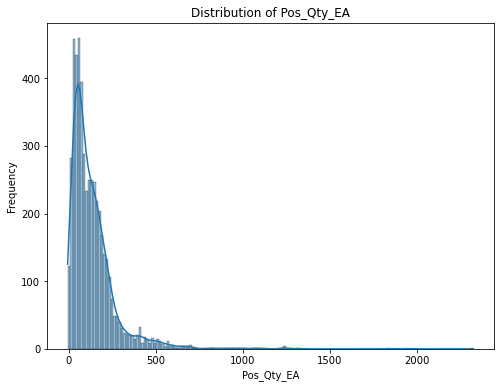

In [66]:
# Distribution plot of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Pos_Qty_EA', kde=True)
plt.xlabel('Pos_Qty_EA')
plt.ylabel('Frequency')
plt.title('Distribution of Pos_Qty_EA')
plt.show()

The distribution plot of the target variable Pos_Qty_EA showcases a majority of values concentrated between 0 and 500, with a notable peak in frequency within this range.

### 3.5.2 Relationship between Pos_Qty_EA and Total_Sales

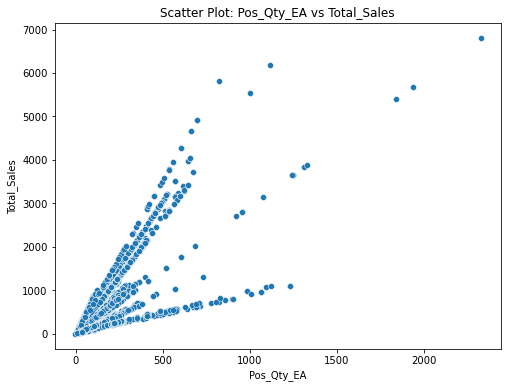

In [67]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Pos_Qty_EA', y='Total_Sales')
plt.xlabel('Pos_Qty_EA')
plt.ylabel('Total_Sales')
plt.title('Scatter Plot: Pos_Qty_EA vs Total_Sales')
plt.show()

The scatter plot demonstrates a positive correlation between Pos_Qty_EA and Total_Sales, highlighting a potential pattern indicating that higher values of Pos_Qty_EA tend to correspond with higher values of Total_Sales.

## 3.6 Feature Engineering

### 3.6.1 Correlation Heapmap

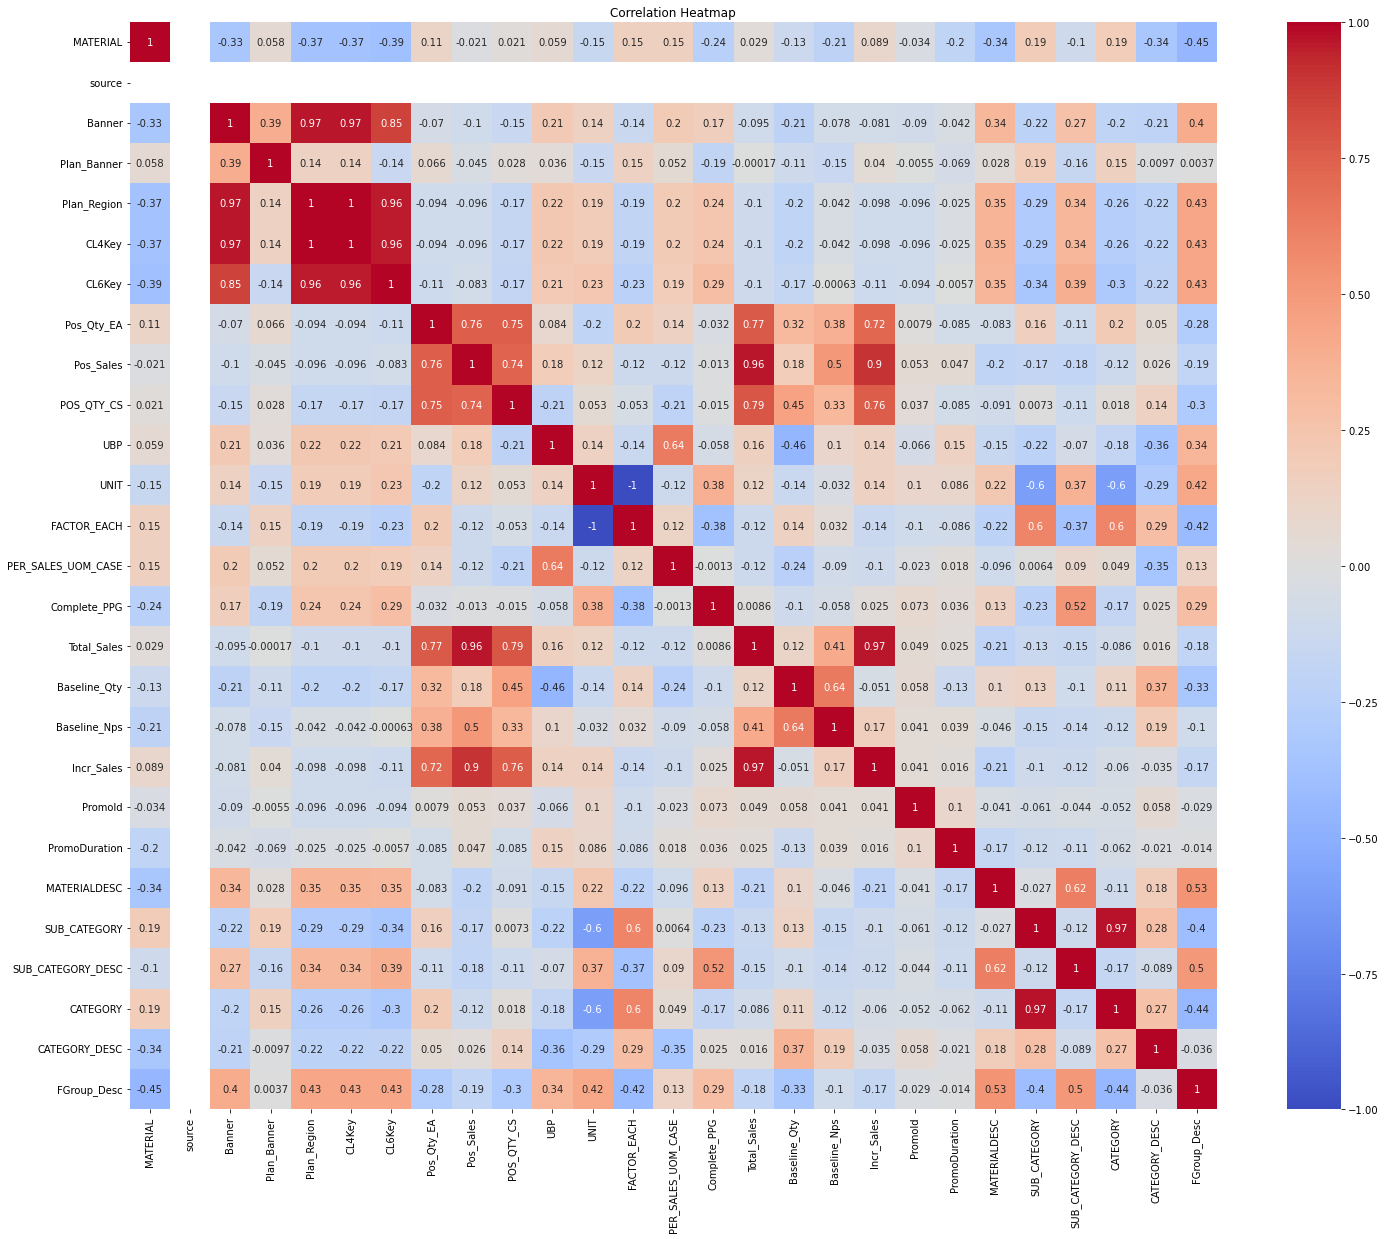

In [69]:
# Correlation heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


Representing the correlation between numerical features in this dataset, the color-coded heatmap provides insights into the relationships and dependencies among different features, including the target variable 'Pos_Qty_EA'. It highlights the strength and direction of these correlations.

### 3.6.2 Calculation and Ranking of Feature Correlation with the Target Variable

In [70]:
# Calculate the correlation between each feature and the target variable
correlation = df.corr()['Pos_Qty_EA'].drop('Pos_Qty_EA')

# Sort the correlation values in descending order
correlation = correlation.abs().sort_values(ascending=False)

# Print the feature correlation values
print(correlation)

Total_Sales           0.766402
Pos_Sales             0.756081
POS_QTY_CS            0.754481
Incr_Sales            0.723748
Baseline_Nps          0.381053
Baseline_Qty          0.319445
FGroup_Desc           0.284755
FACTOR_EACH           0.202740
UNIT                  0.202740
CATEGORY              0.198196
SUB_CATEGORY          0.160523
PER_SALES_UOM_CASE    0.141438
MATERIAL              0.114242
CL6Key                0.112746
SUB_CATEGORY_DESC     0.110251
Plan_Region           0.093958
CL4Key                0.093958
PromoDuration         0.085232
UBP                   0.083661
MATERIALDESC          0.082824
Banner                0.069616
Plan_Banner           0.066433
CATEGORY_DESC         0.050336
Complete_PPG          0.032486
PromoId               0.007910
source                     NaN
Name: Pos_Qty_EA, dtype: float64


### 3.6.3 Identification of Highly Correlated Features with the Target Variable based on a Threshold

In [71]:
# Set the correlation threshold
threshold = 0.5

# Filter features based on the correlation threshold
highly_correlated_features = correlation[correlation.abs() >= threshold]

# Print the highly correlated features
print(highly_correlated_features)

Total_Sales    0.766402
Pos_Sales      0.756081
POS_QTY_CS     0.754481
Incr_Sales     0.723748
Name: Pos_Qty_EA, dtype: float64


In [72]:
# These are the selected features 
threshold_selected_features = highly_correlated_features.index.tolist()
threshold_selected_features

['Total_Sales', 'Pos_Sales', 'POS_QTY_CS', 'Incr_Sales']

### 3.6.4 Feature selection using Recursive Feature Elimination (RFE)

In [73]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into X (features) and y (target variable)
X = df.drop(columns=["Pos_Qty_EA"])
y = df["Pos_Qty_EA"]

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt")

# Use RFE for feature selection
top_k = 5  # Number of top features to select
rfe = RFE(estimator=rf, n_features_to_select=top_k, step=1)
rfe = rfe.fit(X, y)

# Get the selected features
rfe_selected_features = X.columns[rfe.support_].tolist()

In [74]:
rfe_selected_features =list(rfe_selected_features)
rfe_selected_features

['Pos_Sales', 'POS_QTY_CS', 'Total_Sales', 'Incr_Sales', 'FGroup_Desc']

## 3.7 Model Selection

In this section, we will train multiple models using the dataset and evaluate their performance to select the model that achieves the highest level of accuracy. By comparing the accuracy of different models, we can determine which one is the most effective for this particular task. This process will enable us to make an informed decision about the best model to use for prediction or further analysis.


### 3.7.1 Import Libraries

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score

### 3.7.2 Model Comparison

In [76]:
# Separate features and target
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store model names and instances
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Naive Bayes': GaussianNB()
}

# Create an empty dataframe to store accuracy scores
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Iterate over the models, train, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred.round())  # Rounding the predictions for classification
    accuracy_df = accuracy_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

In [77]:
# rank the model based on the accuracy
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)
accuracy_df

,Model,Accuracy
1,Decision Tree,0.741709
2,Random Forest,0.647236
6,K-Nearest Neighbors,0.120603
3,Gradient Boosting,0.086432
7,Naive Bayes,0.031156
0,Linear Regression,0.011055
4,Support Vector Machine,0.00402
5,Neural Network,0.0


Therefore, the decision forest model and random forest has been chosen as the candidate models based on its performance and accuracy during the evaluation process.

### 3.7.3 Hyperparameter Tune Up with the Candidate Models

In [78]:
from sklearn.model_selection import train_test_split

# Sample dataset
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

# Split the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size (features): {X_train.shape}")
print(f"Test set size (features): {X_test.shape}")
print(f"Training set size (target): {y_train.shape}")
print(f"Test set size (target): {y_test.shape}")

Training set size (features): (3976, 26)
Test set size (features): (995, 26)
Training set size (target): (3976,)
Test set size (target): (995,)


In [79]:
def perform_hyperparameter_tuning(X_train, y_train):
    """
    Performs hyperparameter tuning for Decision Tree and Random Forest models
    using GridSearchCV.
    
    Args:
    - X_train (pd.DataFrame): Training data features.
    - y_train (pd.Series): Training data target.
    
    Returns:
    - dict: Best hyperparameters for both models.
    """
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV

    # For Decision Tree
    param_grid_dt = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    dt = DecisionTreeRegressor()
    grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, 
                                  cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search_dt.fit(X_train, y_train)
    best_params_dt = grid_search_dt.best_params_
    print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

    # For Random Forest
    param_grid_rf = {
        'n_estimators': [10, 50],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor()
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                                  cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search_rf.fit(X_train, y_train)
    best_params_rf = grid_search_rf.best_params_
    print(f"Best hyperparameters for Random Forest: {best_params_rf}")

    return {"DecisionTree": best_params_dt, "RandomForest": best_params_rf}

# Call the function
results = perform_hyperparameter_tuning(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best hyperparameters for Decision Tree: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for Random Forest: {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [80]:
results

{'DecisionTree': {'max_depth': 40,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'RandomForest': {'max_depth': 50,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50}}

### 3.7.4 Model Comparison after Hyperparameter Tune Up

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    """
    Train the model, predict on test data, and evaluate using various metrics.
    
    Args:
    - model (Regressor): Scikit-learn regressor model.
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    
    Returns:
    - dict: Evaluation metrics (MAE, MSE, R2).
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {"MAE": mae, "MSE": mse, "R2": r2}

# Initialize models with best hyperparameters
dt_model = DecisionTreeRegressor(**results['DecisionTree'])
rf_model = RandomForestRegressor(**results['RandomForest'])

# Evaluate Decision Tree performance
dt_metrics = evaluate_model_performance(dt_model, X_train, y_train, X_test, y_test)
print(f"Decision Tree Metrics:\nMAE: {dt_metrics['MAE']}\nMSE: {dt_metrics['MSE']}\nR2: {dt_metrics['R2']}")

# Evaluate Random Forest performance
rf_metrics = evaluate_model_performance(rf_model, X_train, y_train, X_test, y_test)
print(f"\nRandom Forest Metrics:\nMAE: {rf_metrics['MAE']}\nMSE: {rf_metrics['MSE']}\nR2: {rf_metrics['R2']}")


Decision Tree Metrics:
MAE: 1.1216080402010051
MSE: 44.14472361809045
R2: 0.997288885934199

Random Forest Metrics:
MAE: 1.1643216080402012
MSE: 17.73691376884422
R2: 0.998910701156074


In [82]:
# Create a DataFrame
metrics_df = pd.DataFrame({
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
})

# Display the DataFrame
metrics_df

,Decision Tree,Random Forest
MAE,1.121608,1.164322
MSE,44.144724,17.736914
R2,0.997289,0.998911


Key Points to Consider:

1. MAE and MSE: In both cases, the Decision Tree has a lower MAE and a higher MSE than the Random Forest. MAE measures the average absolute error, while MSE penalizes larger errors more heavily. Lower MAE and MSE values indicate better performance, which would favor the Decision Tree in this regard.

2. R-squared (R2): R2 measures how well the model explains the variability of the data. Both models have very high R2 values, indicating that they fit the data well. The Random Forest has a slightly higher R2 value, suggesting that it may explain the data's variability slightly better than the Decision Tree.

In summary, if your primary concern is to minimize absolute errors and mean squared errors, the Decision Tree might be a better choice based on the provided results. However, if capturing more of the data's variability and slightly higher predictive performance is essential, the Random Forest could be favored due to its higher R2 value.